# 时间序列
时间序列是按照时间排序的一组随机变量，它通常是在相等间隔的时间段内依照给定的采样率对某种潜在过程进行观测的结果。时间序列数据本质上反映的是某个或者某些随机变量随时间不断变化的趋势，而时间序列预测方法的核心就是从数据中挖掘出这种规律，并利用其对将来的数据做出估计。  
构成要素：长期趋势，季节变动，循环变动，不规则变动。  
1. 长期趋势（ T ）现象在较长时期内受某种根本性因素作用而形成的总的变动趋势。  
2. 季节变动（ S ）现象在一年内随着季节的变化而发生的有规律的周期性变动。  
3. 循环变动（ C ）现象以若干年为周期所呈现出的波浪起伏形态的有规律的变动。  
4. 不规则变动（I ）是一种无规律可循的变动，包括严格的随机变动和不规则的突发性影响很大的变动两种类型。

## 描述性分析

### 图形描述
下表给出了2000-2013年我国的啤酒产量,人均GDP,煤炭能源占比和居民消费价格指数（CPI）的时间序列

In [115]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
plt.rcParams['font.family'] = 'SimHei'
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import math

In [2]:
data = pd.read_excel('data/例13.1.xlsx')
data.head()

,年份,啤酒产量 （万千升）,人均GDP （元）,煤炭占能源消费 总量的比重(%),居民消费价格指数（上年=100）
0,2000,2231.3,7857.7,69.2,100.4
1,2001,2288.9,8621.7,68.3,100.7
2,2002,2402.7,9398.1,68.0,99.2
3,2003,2540.5,10542.0,69.8,101.2
4,2004,2948.6,12335.6,69.5,103.9


No handles with labels found to put in legend.


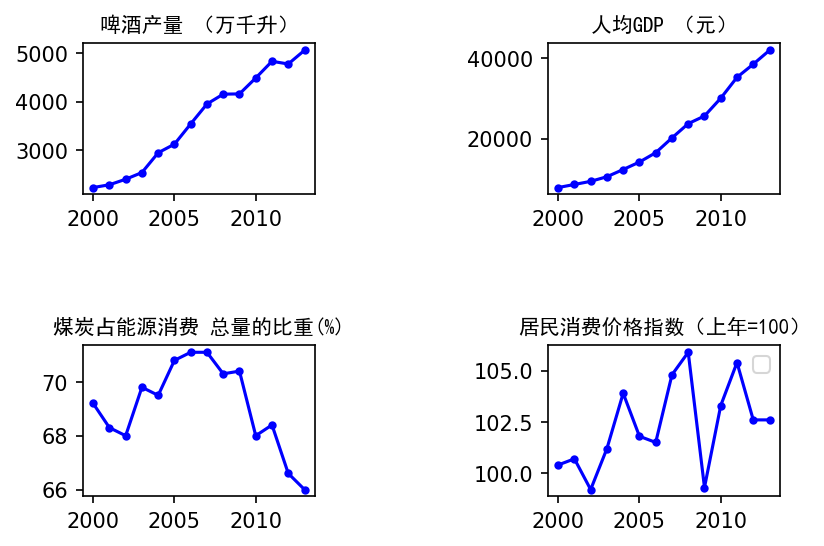

In [26]:
y = data.iloc[:,0] 
index1 = data.iloc[:,1] 
index2 = data.iloc[:,2] 
index3 = data.iloc[:,3] 
index4 = data.iloc[:,4]
fig=plt.figure(dpi=150)
ax1=fig.add_subplot(221)
ax1.set_title("啤酒产量 （万千升）",fontproperties="SimHei")
ax1.plot(y,index1,'b.-')

ax2=fig.add_subplot(222)
ax2.plot(y,index2,'b.-')
ax2.set_title("人均GDP （元）",fontproperties="SimHei")

ax3=fig.add_subplot(223)
ax3.plot(y,index3,'b.-')
ax3.set_title("煤炭占能源消费 总量的比重(%)",fontproperties="SimHei")

ax4=fig.add_subplot(224)
ax4.plot(y,index4,'b.-')
ax4.set_title("居民消费价格指数（上年=100）",fontproperties="SimHei")

plt.legend()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)

### 增长率
![10-1](img/10-1.jpg)
![10-2](img/10-2.jpg)
预测2014和2015年的啤酒产量

In [40]:
G_ = (index1.values[-1]/index1[0])**(1/13)-1
G_

0.06503327093128775

In [41]:
y2014 =( G_+1)*index1.values[-1]
y2014

5390.6659008187125

In [42]:
y2015 =( G_+1)*y2014
y2015

5741.23853684671

## 时间序列的预测程序
### 确定预测成分

In [45]:
data = pd.read_excel('data/例13.3.xlsx')
data.head()

,日期（周）,收盘价格（元）
0,1,15.03
1,2,11.69
2,3,9.63
3,4,10.58
4,5,8.48


In [56]:
x  = data.values[:,0]
y = data.values[:,1]
x_  = data.values[:,0].mean()
y_ = data.values[:,1].mean()
a = sum((x-x_)*(y-y_))/sum((x-x_)**2)
b = y_ - a*x_
print("y = "+str(b)+" "+str(a) +"x" )
def regression(x):
    return b+a*x 

y = 12.02325 -0.481485294117647x


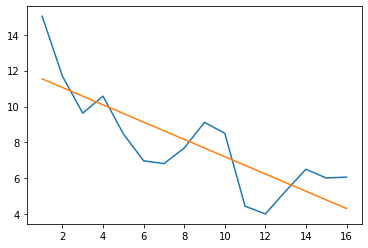

In [57]:
plt.plot(x,y)
plt.plot(x,(regression(x)))

In [63]:
def R2(x,y,reg):
    SSR = sum((reg(x)- y.mean())**2)
    SST = sum((y - y.mean())**2)
    R2 = SSR/SST
    return R2
R2(x,y,regression)

0.6450235402348335

回归系数检验呈现线性关系显著

[7121.02707242  286.66636523  162.27630867]
[[ 3.86562569e+05 -1.06427036e+05  6.11649643e+03]
 [-1.06427036e+05  3.63625702e+04 -2.29368611e+03]
 [ 6.11649643e+03 -2.29368611e+03  1.52912409e+02]]


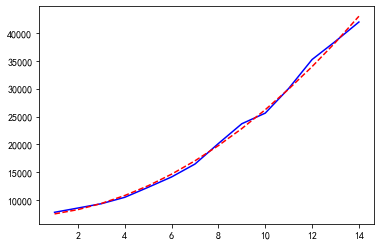

In [135]:
def fund(x, a, b,c):
    return a+b*x+c*x**2
plt.plot(x,y,'b-')
popt, pcov = curve_fit(fund, x, y)
#popt数组中，三个值分别是待求参数a,b,c
y2 = [fund(i, popt[0],popt[1],popt[2]) for i in x]
plt.plot(x,y2,'r--')
print(popt)
print(pcov)

In [68]:
def f(x):
    return popt[0]+popt[1]*x+popt[2]*x**2
R2(x,y,f)

0.7841000116475234

### 确定季度成分

In [14]:
data = pd.read_excel('data/例13.5.xlsx',header=1,index_col=0,usecols=[0,1,2,3,4]).dropna()
data.head()

,1,2,3,4
2010年,25,32,37,26
2011年,30,38,42,30
2012年,29,39,50,35
2013年,30,39,51,37
2014年,29,42,55,38


Text(0.5, 1.0, '啤酒销售量')

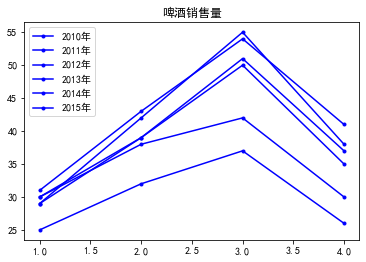

In [32]:
index = data.columns
length = len(data)
for i in range(length):
    plt.plot(index,data.values[i], 'b.-',label=data.index[i])
plt.legend()
plt.title("啤酒销售量")

说明既有季节因素，也有上升趋势
## 选择预测的方法
![13-1](img/13-1.jpg)

## 预测方法的评估

1. 平均误差 ![13-2](img/13-2.jpg) 
2. 平均绝对误差![13-3](img/13-3.jpg)
3. 均方误差![13-4](img/13-4.jpg)
4. 平均百分比误差和平均绝对百分比误差![13-5](img/13-5.jpg)

## 平稳序列的预测
### 简答平均法
![13-6](img/13-6.jpg)
简答预测居民消费指数

In [37]:
data  = pd.read_excel('data/例13.6.xlsx')
data.head()

,年份,居民消费价格指数（上年=100）
0,2000,100.4
1,2001,100.7
2,2002,99.2
3,2003,101.2
4,2004,103.9


In [45]:
F2014 = data.iloc[:,1].mean()
F2014

102.32857142857141

### 平均移动法
![13-7](img/13-7.jpg)

In [48]:
data.rolling(3).mean().dropna()

,年份,居民消费价格指数（上年=100）
2,2001.0,100.100000
3,2002.0,100.366667
4,2003.0,101.433333
5,2004.0,102.300000
6,2005.0,102.400000
7,2006.0,102.700000
8,2007.0,104.066667
9,2008.0,103.333333
10,2009.0,102.833333
11,2010.0,102.666667


Text(0.5, 1.0, '简单移动平均')

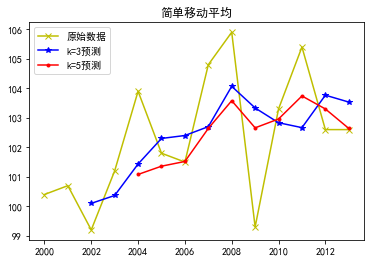

In [69]:
index =  data.values[:,0]
plt.plot(index,data.iloc[:,1], 'yx-',label='原始数据')
plt.plot(index,data.rolling(3).mean().iloc[:,1], 'b*-',label='k=3预测')
plt.plot(index,data.rolling(5).mean().iloc[:,1], 'r.-',label='k=5预测')
plt.legend()
plt.title("简单移动平均")

### 指数平滑法

简单指数平滑
![13-8](img/13-8.jpg)

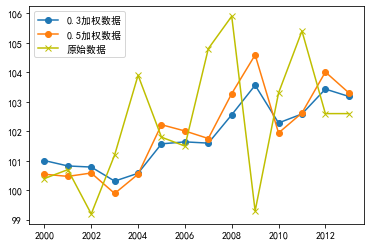

In [83]:
timeData = data.iloc[:,1]
ets = SimpleExpSmoothing(timeData)
fit1 = ets.fit(smoothing_level=0.3)
fit2 = ets.fit(smoothing_level=0.5)
plt.plot(index,fit1.fittedvalues, marker='o',label='0.3加权数据')
plt.plot(index,fit2.fittedvalues, marker='o',label='0.5加权数据')
plt.plot(index,timeData, 'yx-',label='原始数据')
plt.legend()

## 趋势线序列的预测

### 线性趋势

![13-9](img/13-9.jpg)

In [240]:
data = pd.read_excel('data/例13.1.xlsx',usecols=[0,1])
data.head()

,年份,啤酒产量 （万千升）
0,2000,2231.3
1,2001,2288.9
2,2002,2402.7
3,2003,2540.5
4,2004,2948.6


In [241]:
x = data.values[:,0]-1999
y =  data.values[:,1]
n = len(data)
def mini2(x,y,n):
    b1 = (n*sum(x*y)- sum(x)*sum(y))/(n*sum(x**2)- sum(x)**2 )
    b0 = y.mean() - b1*x.mean()
    print('y = '+str(b0)+'+'+str(b1) + 't')
    return b0,b1
b0,b1 = mini2(x,y,n)

y = 1807.1604395604406+240.1852747252746t


In [108]:
def regress(x):
    return b0+ b1*x
y1 = regress(x)

Text(0.5, 1.0, '啤酒产量')

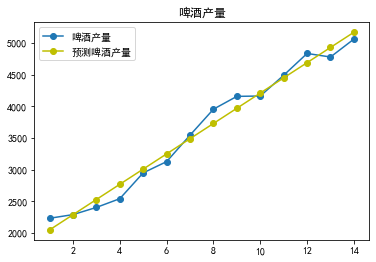

In [109]:
plt.plot(x,y, marker='o',label='啤酒产量')
plt.plot(x,y1,c='y', marker='o',label='预测啤酒产量')
plt.legend()
plt.title("啤酒产量")

### 非线性趋势预测

#### 指数曲线

![13-10](img/13-10.jpg)
![13-11](img/13-11.jpg)

In [111]:
data = pd.read_excel('data/例13.1.xlsx',usecols=[0,2])
data.head()

,年份,人均GDP （元）
0,2000,7857.7
1,2001,8621.7
2,2002,9398.1
3,2003,10542.0
4,2004,12335.6


In [128]:
x = data.values[:,0]-1999
y = data.values[:,1]
n = len(data)
b0,b1 = mini2(x,np.log(y),n)

y = 8.768122661671134+0.13804917184210827t


In [129]:
b1 = np.exp(b1)
b0 = np.exp(b0)
print('y = '+str(b0)+'+'+str(b1) + 't')

y = 6426.097174676726+1.1480319997345314t


In [133]:
def regress(x):
    return b0*b1**x
y1 = regress(x)

Text(0.5, 1.0, '人均GDP')

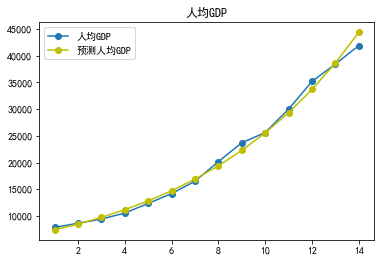

In [134]:
plt.plot(x,y, marker='o',label='人均GDP')
plt.plot(x,y1,c='y', marker='o',label='预测人均GDP')
plt.legend()
plt.title("人均GDP")

#### 多阶曲线

In [138]:
data = pd.read_excel('data/例13.1.xlsx',usecols=[0,3])
data.head()

,年份,煤炭占能源消费 总量的比重(%)
0,2000,69.2
1,2001,68.3
2,2002,68.0
3,2003,69.8
4,2004,69.5


In [139]:
x = data.values[:,0]-1999
y = data.values[:,1]
popt, pcov = curve_fit(fund, x, y)

In [140]:
popt

array([66.7467033 ,  1.14927198, -0.08633242])

Text(0.5, 1.0, '煤炭占能源消费 总量的比重(%)')

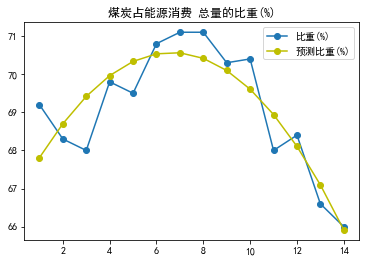

In [143]:
y1 = [fund(i, popt[0],popt[1],popt[2]) for i in x]
plt.plot(x,y, marker='o',label='比重(%)')
plt.plot(x,y1,c='y', marker='o',label='预测比重(%)')
plt.legend()
plt.title("煤炭占能源消费 总量的比重(%)")

## 复合型序列的分解预测

* Y = T * S * I

### 确定分析季节成分

In [147]:
df = pd.read_excel('data/例13.12.xlsx',header=1,index_col=0,usecols=[0,1,2,3,4]).dropna()
df.head()

,1,2,3,4
2010年,25.0,32.0,37.0,26.0
2011年,30.0,38.0,42.0,30.0
2012年,29.0,39.0,50.0,35.0
2013年,30.0,39.0,51.0,37.0
2014年,29.0,42.0,55.0,38.0


Text(0.5, 1.0, '啤酒销售量')

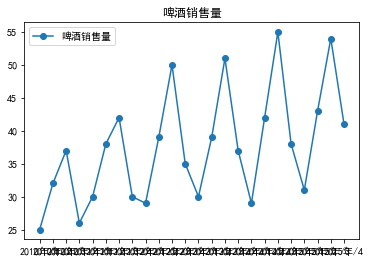

In [257]:
data= [j for i in df.values for j in i]
index = ['2010年/1','2010年/2','2010年/3','2010年/4', '2011年/1','2011年/2','2011年/3','2011年/4', '2012年/1','2012年/2','2012年/3','2012年/4', '2013年/1','2013年/2','2013年/3','2013年/4', '2014年/1', '2014年/2','2014年/3','2014年/4','2015年/1','2015年/2','2015年/3','2015年/4']
plt.plot(index,data, marker='o',label='啤酒销售量')
plt.legend()
plt.title("啤酒销售量")

![13-12](img/13-12.jpg)

In [258]:
meanList = []
last= 0
for i in range(len(data)-3):
    m = np.mean(data[i:i+4])
    if last != 0 :
        meanList.append((m+last)/2)
    last = m
meanList

[30.625,
 32.0,
 33.375,
 34.5,
 34.875,
 34.875,
 36.0,
 37.625,
 38.375,
 38.5,
 38.625,
 39.0,
 39.125,
 39.375,
 40.25,
 40.875,
 41.25,
 41.625,
 41.625,
 41.875]

In [259]:
rate = np.array(data[2:-2])/np.array(meanList)
rate

array([1.20816327, 0.8125    , 0.8988764 , 1.10144928, 1.20430108,
       0.86021505, 0.80555556, 1.03654485, 1.3029316 , 0.90909091,
       0.77669903, 1.        , 1.30351438, 0.93968254, 0.72049689,
       1.02752294, 1.33333333, 0.91291291, 0.74474474, 1.02686567])

In [260]:
total = np.mean(rate)
total

0.996270021202959

In [261]:
n = int(len(rate)/4)
index1 = np.arange(n)*4
index1

array([ 0,  4,  8, 12, 16])

In [262]:
q1 = rate[index1+2]
q2 = rate[index1+3]
q3 = rate[index1]
q4 = rate[index1+1]

In [263]:
qr1 = q1.mean()/total
print(qr1)
qr2 = q2.mean()/total
print(qr2)
qr3 = q3.mean()/total
print(qr3)
qr4 = q4.mean()/total
print(qr4)

0.7922295249967946
1.0423645443054999
1.2752052178236146
0.8902007128740916


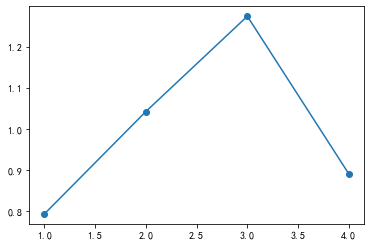

In [264]:
plt.plot([1,2,3,4],[qr1,qr2,qr3,qr4], marker='o',label='啤酒销售量')

#### 分离季节成分

![13-13](img/13-13.jpg)

In [265]:
qr = [qr1,qr2,qr3,qr4]
y1 = []
for i in range(len(data)):
    y1.append(data[i]/qr[i%4])
y1

[31.55651135332422,
 30.69943253041167,
 29.014937739313588,
 29.206896404358858,
 37.867813623989065,
 36.45557612986386,
 32.93587527165326,
 33.70026508195253,
 36.605553169856094,
 37.414933396439224,
 39.20937532339674,
 39.316975928944615,
 37.867813623989065,
 37.414933396439224,
 39.99356282986467,
 41.563660267741454,
 36.605553169856094,
 40.29300519616532,
 43.13031285573641,
 42.687002437139874,
 39.13007407812203,
 41.252362462740685,
 42.346125349268476,
 46.05702894533513]

Text(0.5, 1.0, '啤酒销售量')

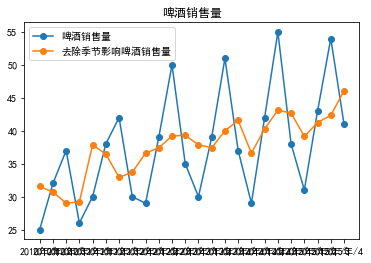

In [266]:
plt.plot(index,data, marker='o',label='啤酒销售量')
plt.plot(index,y1, marker='o',label='去除季节影响啤酒销售量')
plt.legend()
plt.title("啤酒销售量")

## 建立模型预测

In [267]:
n = len(y1)
b0,b1 = mini2(np.arange(n)+1,np.array(y1),n)

y = 30.606679709962226+0.5592175584226957t


In [268]:
def regress(n):
    return b0+b1*n

In [269]:
y25 = regress(25)
y25

44.58711867052962

In [270]:
y_p = []
for i in  range(n):
    y_p.append(regress(n)*qr[i%4])
y_p

[34.88020318465031,
 45.89312307944895,
 56.14460922798087,
 39.193668956347594,
 34.88020318465031,
 45.89312307944895,
 56.14460922798087,
 39.193668956347594,
 34.88020318465031,
 45.89312307944895,
 56.14460922798087,
 39.193668956347594,
 34.88020318465031,
 45.89312307944895,
 56.14460922798087,
 39.193668956347594,
 34.88020318465031,
 45.89312307944895,
 56.14460922798087,
 39.193668956347594,
 34.88020318465031,
 45.89312307944895,
 56.14460922798087,
 39.193668956347594]

Text(0.5, 1.0, '啤酒销售量')

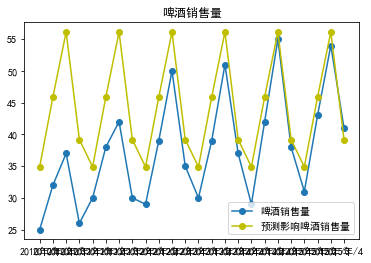

In [271]:
plt.plot(index,data, marker='o',label='啤酒销售量')
plt.plot(index,y_p,c='y', marker='o',label='预测影响啤酒销售量')
plt.legend()
plt.title("啤酒销售量")